## Problématique: Comment pourrait-on reconnaitre le modèle d'un avion sans être forcément en contact avec le cockpit. 

![A 380](/Users/aliou/Downloads/huge_projects/aircraft_reco/codes/notebooks/a380_.jpg)

Etant un passionné d'aviation j'essaye toujours d'identifier les avions que j'apperçois, certains sont relativement facile à reconnaître grâce à des formes originales et spécifiques par exemple: les ailes de l'Airbus A380, sa forme ovale et sa taille surdimentionnée sont spécifique à cet appareil (Pour la petite histoire: Les ailes de l'A380 sont inspiré de celles des rapaces comme le faucon étant l'animal le plus rapide au monde et un des plus gros, il arrive néanmoins à se stabilisé parfaitement rien qu'en changeant le sens l'orientation des plumes situés au bout de ses ailes. Alors les concepteurs de l'A380 s'en sont inspirés et c'est pourquoi que le wing tip de l'A380 ressemble à un petit triange).

Mais pour la pluspart des avions la différence se situe sur de petits endroits de la structure de l'appareil, exemple: comment reconnaître un Airbus A320 d'un Boeing 737 ? si l'on regarde le nez de l'appareil avec plus d'attention on constate que le 737 à un nez un peu plus géométrique, si l'on se basait sur les ailes ce serait compliqué car ils ont tous deux des ailes plates.

La différence se situe aussi sur cetains points plus subtile, comme la taille des réacteurs, ce qui est plus difficile à distinguer à l'oeil nu.

Outre que le côté passionné désireux d'identifier des avions. Imaginons une tour de contrôle qui perd le contact avec des avions au alentours, et il y'a un avion qui désire se poser, mais comment savoir si cet aeroport peut l'accueillir ? - On pourrais avoir un système de détection d'avions qui identifierais le modèle de l'appareil et au moyen d'un panneau électrique spécifier au pilote si il peut se poser ou il pourrait aussi alerter les services de secours pour que ceux-ci se preparent à un e intervention d'urgence en si l'appareil risque un accident. 

Ceci est un cas spécifique mais vous l'aurez compris un tel système pourrait avoir beaucoup d'utilité et de practicité.

Alors le but c'est comment entraîner une IA à reconnaître toutes les subtilité d'un modèle d'avion au point de dire avec une certaines certitude de quel modèle il s'agit.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-01-24 15:00:12.552093: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [5]:
import seaborn as sns

In [6]:
from tensorflow.keras.preprocessing import image

In [7]:
from PIL import Image

## Construction des d'entrainement et de validation

In [13]:
# Repertoire de base
base_dir = "/Users/aliou/Downloads/huge_projects/aircraft_reco/final_data"

In [14]:
train_dir = base_dir + '/train'
test_dir = base_dir + '/test'

# Repertoires des images d'entrainement et de test
a_320_train_dir = train_dir + '/Airbus_320'
a_320_test_dir = test_dir + '/Airbus_320'

a_340_train_dir = train_dir + '/Airbus_340'
a_340_test_dir = test_dir + '/Airbus_340'

a_380_train_dir = train_dir + '/Airbus_380'
a_380_test_dir = test_dir + '/Airbus_380'

b_737_train_dir = train_dir + '/Boeing_737'
b_737_test_dir = test_dir + '/Boeing_737'

b_747_train_dir = train_dir + '/Boeing_747'
b_747_test_dir = test_dir + '/Boeing_747'

b_767_train_dir = train_dir + '/Boeing_767'
b_767_test_dir = test_dir + '/Boeing_767'

embraer_ejet_train_dir = train_dir + '/Embraer_ejet'
embraer_ejet_test_dir = test_dir + '/Embraer_ejet'

In [16]:
# Nombre total d'images contenu dans chaque repertoire
print('total training A320 images :', len(os.listdir(      a_320_train_dir ) ))
print('total training A340 images :', len(os.listdir(      a_340_train_dir ) ))
print('total training A380 images :', len(os.listdir(      a_380_train_dir ) ))
print('total training B737 images :', len(os.listdir(      b_737_train_dir ) ))
print('total training B747 images :', len(os.listdir(      b_747_train_dir ) ))
print('total training B767 images :', len(os.listdir(      b_767_train_dir ) ))
print('total training EEJET images :', len(os.listdir(      embraer_ejet_train_dir ) ))
print()
print('total test A320 images :', len(os.listdir(      a_320_test_dir ) ))
print('total test A340 images :', len(os.listdir(      a_340_test_dir ) ))
print('total test A380 images :', len(os.listdir(      a_380_test_dir ) ))
print('total test B737 images :', len(os.listdir(      b_737_test_dir ) ))
print('total test B747 images :', len(os.listdir(      b_747_test_dir ) ))
print('total test B767 images :', len(os.listdir(      b_767_test_dir ) ))
print('total test EEJET images :', len(os.listdir(      embraer_ejet_test_dir ) ))

total training A320 images : 101
total training A340 images : 101
total training A380 images : 101
total training B737 images : 101
total training B747 images : 101
total training B767 images : 101
total training EEJET images : 91

total test A320 images : 11
total test A340 images : 11
total test A380 images : 11
total test B737 images : 11
total test B747 images : 11
total test B767 images : 11
total test EEJET images : 11


## Visualisation de quelques échentillons

In [24]:
# Fonction de visualisation
def plot_samples(dir, sample, n_ligne = 3, n_col = 4):

    """
        Cette fonction permet de visualiser un échantillons d'image dans une grille NxM (Par défaut: 3 x 4).

        Paramètre:
            dir: Repertoire où se situe les images,
            sample: Echantillons d'image,
            n_ligne: Nombre de lignes,
            n_col: Nombre de colonnes
    """

    plt.figure(figsize = ((n_ligne * n_col), (max(n_ligne, n_col) * 2) ))

    for i, aircraft in enumerate(sample): # Itérer sur l'échantillons donné

        if aircraft != '.DS_Store': # Ignorer le fichier caché .DS_Store

            # Définir une grille de visualisation
            ax = plt.subplot(n_ligne, n_col, i + 1)

            # Combiner le nom du fichier actuel avec le repertoire donné et plotter.
            img = mpimg.imread(os.path.join(dir, aircraft))
            plt.axis("off")
            plt.imshow(img)
            
            # Mettre le nom du fichier comme titre
            ax.set_title(aircraft)

A 320

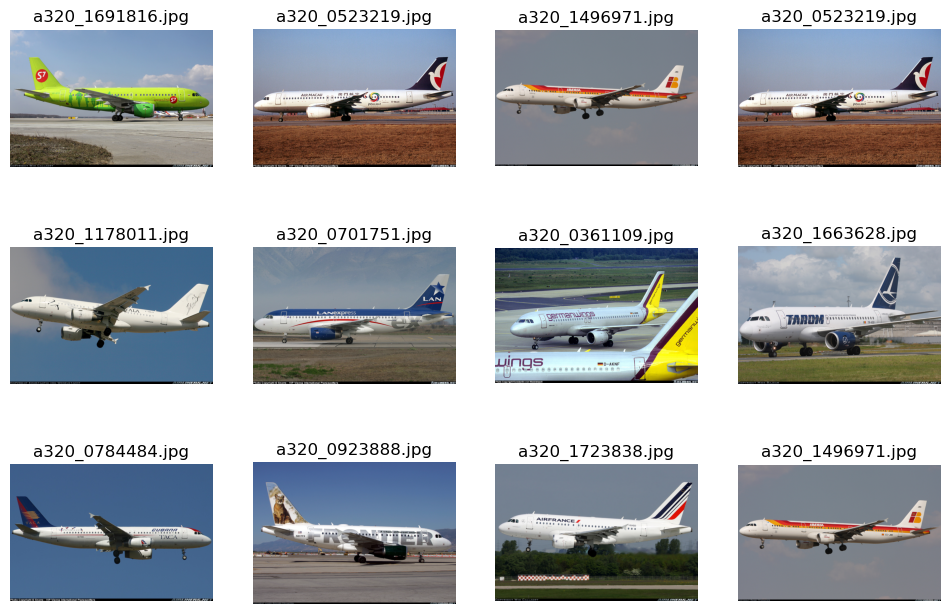

In [25]:
# Choisir 12 échantillons au hasard puis faire appel à la fonction de plot
a_320_sample = np.random.choice(os.listdir(a_320_train_dir),size = 12)
plot_samples(a_320_train_dir, a_320_sample)

A 340

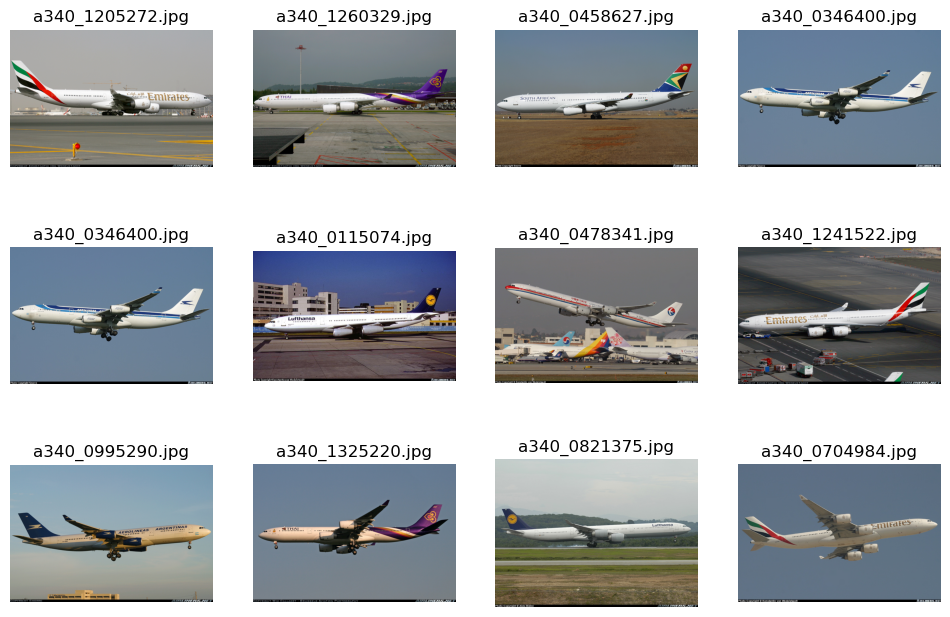

In [21]:
a_340_sample = np.random.choice(os.listdir(a_340_train_dir),size = 12)
plot_samples(a_340_train_dir, a_340_sample)

A 380

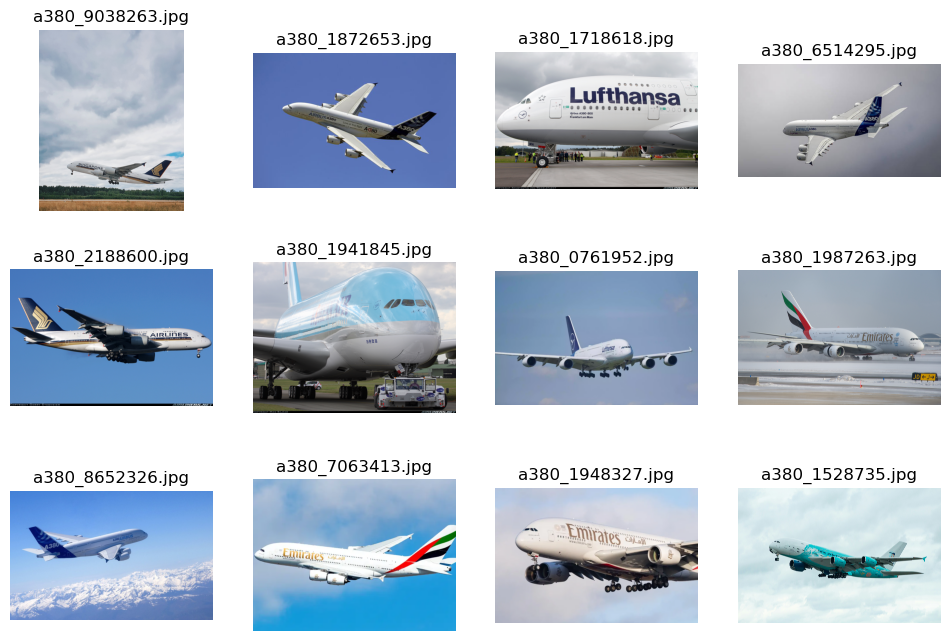

In [22]:
a_380_sample = np.random.choice(os.listdir(a_380_train_dir),size = 12)
plot_samples(a_380_train_dir, a_380_sample)

B 737

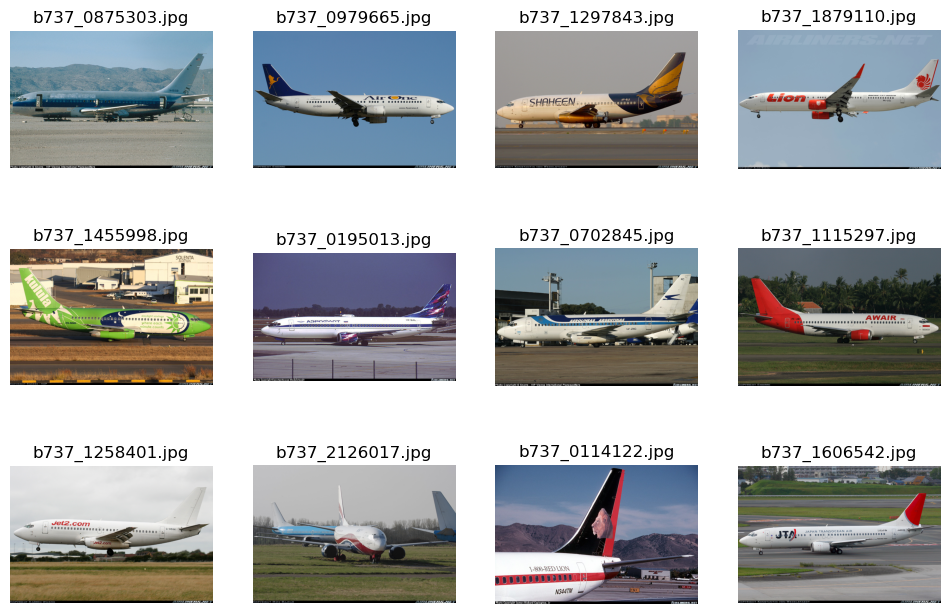

In [23]:
b_737_sample = np.random.choice(os.listdir(b_737_train_dir),size = 12)
plot_samples(b_737_train_dir, b_737_sample)

B 747

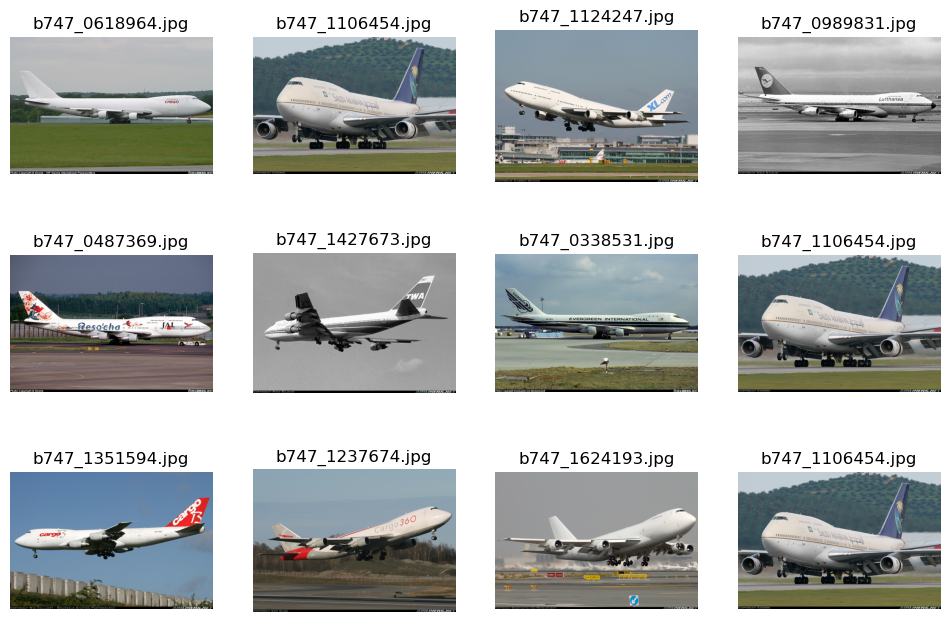

In [24]:
b_747_sample = np.random.choice(os.listdir(b_747_train_dir),size = 12)
plot_samples(b_747_train_dir, b_747_sample)

B 767

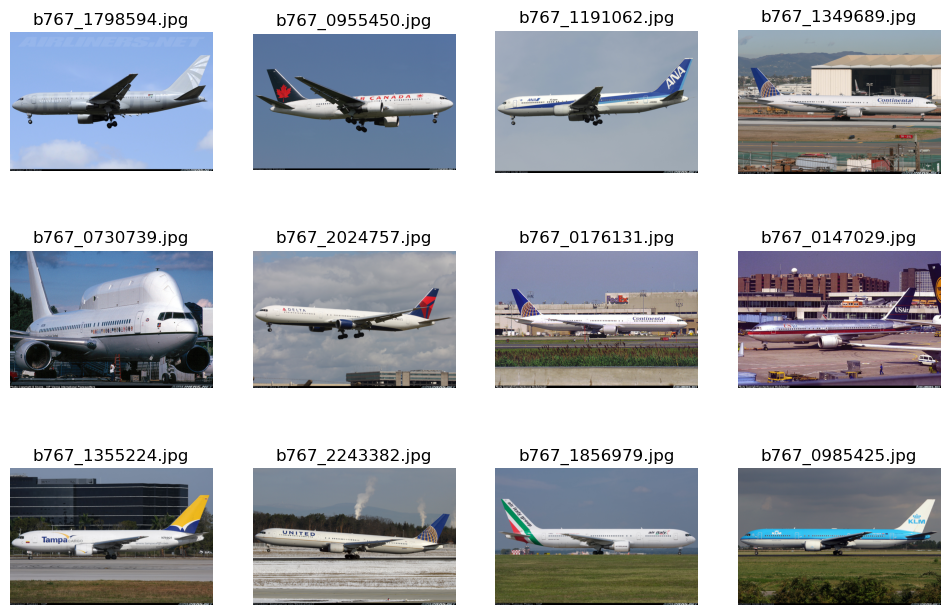

In [25]:
b_767_sample = np.random.choice(os.listdir(b_767_train_dir),size = 12)
plot_samples(b_767_train_dir, b_767_sample)

Embraer Ejet

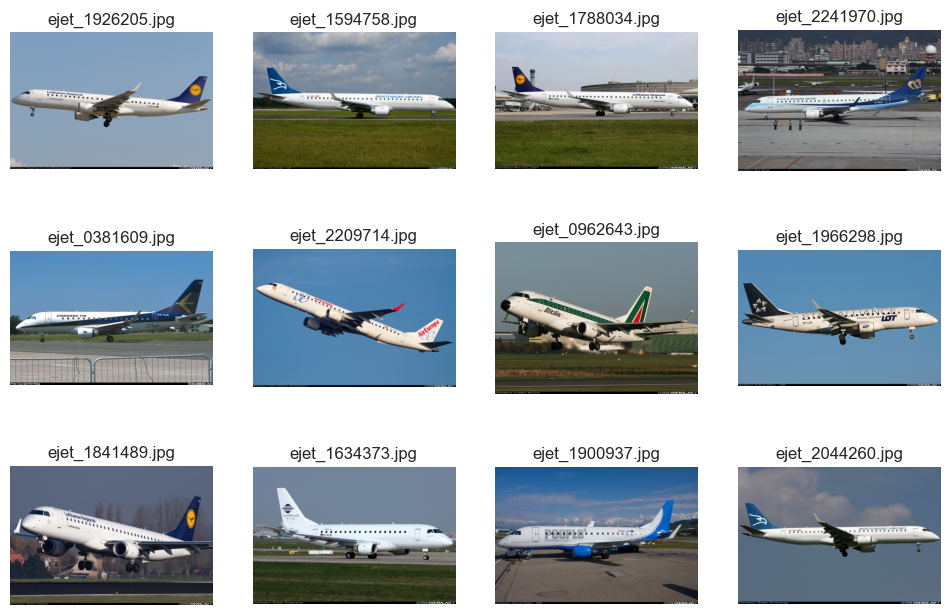

In [103]:
e_ejet_sample = np.random.choice(os.listdir(embraer_ejet_train_dir),size = 12)
plot_samples(embraer_ejet_train_dir, e_ejet_sample)

## Augmentation de données

Paramètre de l'objet ImageDataGenerator:
 - rescale = 1/255.0: Normaliser les images de 0 à 255.
 - rotation_range = 10: Changer l'orientation de l'image avec un dégré de 10 (Ce choix est le dernier retenu après le dernier modèle), conte tenu du fait les images d'avions sont généralement peu sujet au inclinaison, car les points de vues sont généralement les même, une petite rotation assure une modification pas trop excéssive pour la phase de test.
 - fill_mode = 'nearest': Définit comment remplir les pixels vides des images générer. Défault, nearest: copie les pixels voisin pour remplir les pixels vides.

Paramètre des générateur d'image:
 - train_dir: Repertoire d'entrainement,
 - target_size = (500, 500): Découper les images à cette dimension 500x500 pixels, pour le Convolutional Neural Network(cnn),
 - batch_size = 10: Nombre d'image par batch.
 - class_mode = 'sparse': 'sparse', car il existe plusieurs classes dans le jeu de données
 - color_mode = 'grayscale': Mettre les images en gris pour que le modèle apperçoive mieux les features

In [19]:
target_dim = (500, 500)

# Créer un object de la classe ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 10,
    fill_mode = 'nearest' 
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

# Charger et transformer les images des repertoires d'entrainement
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = target_dim,
    batch_size = 10,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = target_dim,
    batch_size = 10,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

Found 690 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [20]:
# Comment est-ce que le générateur à ordonné les classes
test_generator.class_indices

{'Airbus_320': 0,
 'Airbus_340': 1,
 'Airbus_380': 2,
 'Boeing_737': 3,
 'Boeing_747': 4,
 'Boeing_767': 5,
 'Embraer_ejet': 6}

## Construction du modèle séquentiel

input_shape = (500, 500, 1) : J'ai utilisé plusieurs input shape au final 500x500 marche mieux pour l'entrainement, car les images du dataset sont de qualité relativement bonne entre 600x? à du HD. Le paramètre 1, spécifie le nombre de channel qu'attendra le modèle 1: pour des images de gris et 3: pour des rgb.

CNN: J'ai opté pour un cnn car le meilleur choix.
 - Nombre de filtre: Le nombre de filtre est très important car un nombre de filtre beaucoup trop haut au empêche de le modèle de capter certains spécifité dans les images, A contrario un nombre de filtre trop faible capte énormement les bruits du modèle. C'est donc un paramètre sur lequel il faut expérimenter pour l'amélioration du modèle.
 - La fonctino d'activation 'ReLU' permet de prendre le maximum parmis les inputs reçu par les neuronnes, vu que j'essaye de calculer la probablité qu'un avions appartienne à une des 7 classes, cette fonction d'activation est un très bon choix.
 - BatchNormalization: Cette fonction permet d'améliorer le processus d'entrainement en normalisant les données au niveau des couches du réseau.
 - Flatten(): Cette fonction transforme les matrices n dimension à une matrice à 1 dimension
 - Dense(): Créer une couche caché paramètre: (Nombre de neuronnes, fonction d'activation).
    La dernière couche Dense() est la couche de sortie, paramètre: (Nombre de classes, fonction d'activation). Ici la fonction d'activation que j'ai retenu c'est le softmax: qui est une fonction exponentielle normalisée, qui va convertir le vecteur d'entré du neuronne en une distribution de probabilité.



In [16]:
input_shape = (500, 500, 1) 
num_classes = 7  # Classes identifier

model = Sequential([

    Conv2D(4, (3, 3), input_shape=input_shape, activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dropout(0.4),

    Dense(32, activation='relu'),
    BatchNormalization(),
    
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 4)       40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 4)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 249, 249, 4)       16        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 8)       0         
 g2D)                                                            
                                                        

## Compile the model

- Optimiseur (Adam): Basé sur l'optimisation stochastic, cet optimiseur est très performant, pas très gourmant en terme de mémoire, fonctionne très bien avec les problème qui demandent beaucoup de données.
- sparse_categorical_crossentropy: J'utilise cette fonction car elle permet de trouver un index de la classe la plus probable prédite.
- Comme metrics j'ai pris l'(accuracy) pour avoir les mesures de performance.

In [18]:
# Compile the model
model.compile(optimizer = Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Early stopping callback()

Créer un objet de la classe EarlyStopping pour surveiller la loss avec un niveau de patience de 5 steps:
 - Si au bout de 5 pas la valeur de la loss fluctue trop, on arrête l'entraînement.

In [19]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

## Learning rate scheduler callback()

Optimiser le taux d'apprentissage au délà de 10 epochs pour améliorer l'apprentissage

In [20]:
def learning_rate_scheduler(epochs):

    if epochs < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epochs))

In [21]:
# Créer un objet de la classe 'LearningRateScheduler' et envoyer la fonction de programmation du taux d'entrainement.
learning_rate_schedule = LearningRateScheduler(learning_rate_scheduler)

## Fit the model

Entrainement du modèle:
 - Rappel: A ce stade les données font partir des données augmenter avec ImageDataGenerator donc on donne la variable train_generator à la fonction fit() pour l'entrainement et test_generator pour la validation.
 - Le nombre de pas par epoch: défini par la taille du train_generator.
 - epochs: Cette variable détermine le nombre de cycle d'entrainement  à réaliser.
 - callbacks: Appel des fonctions de contrôle réalisées plus haut.

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 30,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks = [early_stopping, learning_rate_schedule]
)

Epoch 1/30
69/69 [==============================] - 68s 950ms/step - loss: 2.0779 - accuracy: 0.2188 - val_loss: 2.1155 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 2/30
69/69 [==============================] - 65s 939ms/step - loss: 1.6853 - accuracy: 0.3725 - val_loss: 2.5495 - val_accuracy: 0.1571 - lr: 0.0010
Epoch 3/30
69/69 [==============================] - 65s 941ms/step - loss: 1.4748 - accuracy: 0.4696 - val_loss: 2.5210 - val_accuracy: 0.1714 - lr: 0.0010
Epoch 4/30
69/69 [==============================] - 65s 942ms/step - loss: 1.3542 - accuracy: 0.5116 - val_loss: 2.3159 - val_accuracy: 0.1857 - lr: 0.0010
Epoch 5/30
69/69 [==============================] - 65s 939ms/step - loss: 1.1072 - accuracy: 0.6101 - val_loss: 1.9374 - val_accuracy: 0.2714 - lr: 0.0010
Epoch 6/30
69/69 [==============================] - 67s 974ms/step - loss: 0.9232 - accuracy: 0.7014 - val_loss: 1.9540 - val_accuracy: 0.2714 - lr: 0.0010
Epoch 7/30
69/69 [==============================] - 65s 927ms/st

In [71]:
# Les variables de mesure de performances
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [23]:
acc = history.history['accuracy'][-1]

loss = history.history['loss'][-1]

print(f"accuracy: {acc}\nloss: {loss}")

accuracy: 0.960869550704956
loss: 0.18091294169425964


## Check for overfitting

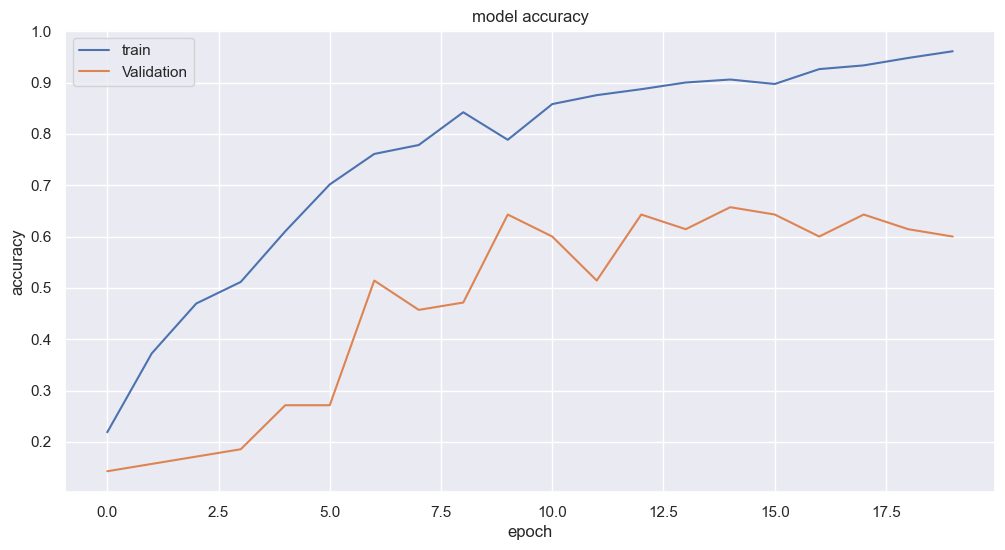

In [24]:
sns.set()
plt.figure(figsize = (12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

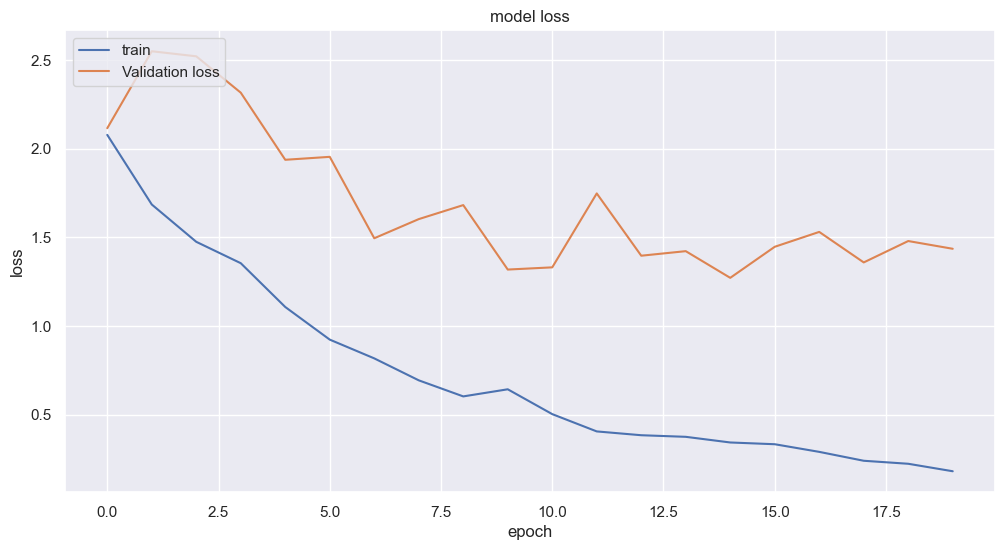

In [25]:
sns.set()
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation loss'], loc='upper left')
plt.show()

## Prédiction

In [22]:
# Créer un dictionnaire des classes pour déterminer la classe prédite de manière dynamique.
classes = {
    0 : 'Airbus A 320',
    1 : 'Airbus A 340',
    2 : 'Airbus A 380',
    3 : 'Boeing 737',
    4 : 'Boeing 747',
    5 : 'Boeing 767',
    6 : 'Embraer E jet'
}

In [21]:
def rgb_to_grayscale(path):

    """
        Transforme l'image à prédire, pour quelle puisse être accepté par le modèle.

        Paramètre:
            path: Chemin d'accès de l'image.
    """
    rgb_image = Image.open(path) # Ouvrir l'image

    grayscale_image = rgb_image.convert('L') # Transformer l'image en gris.
    grayscale_image = np.array(grayscale_image) # Convertir l'image en une matrice de numpy

    # Rédimentionner à l'(input shape) souhaité
    np_image = np.array(Image.fromarray(grayscale_image).resize((500, 500)))

    # Normaliser l'image
    np_image_nomalized = np_image / 255.0
    
    return np_image_nomalized

In [31]:
def predictions_test_set(path, cl : int):

    """
        Cette fonction permet de predir chaque élément contenu dans un repertoire donnée.

        Paramètre:
            path: Chemin d'accès du repertoire.
            cl: Classe des images du repertoire. (Car je l'ai grouper par classe)
    """

    files = os.listdir(path) # Obtenir une liste des noms des images du répertoire
    n_true = 0 # Variable de comptage des vraies prédictions

    for _, filename in enumerate(files):
        
        if filename != '.DS_Store': # Ignorer le fichier caché '.DS_Store'
            
            img = rgb_to_grayscale(path + '/' + filename) # Construire le chémin de l'image et la transformer
            preds_probs = model.predict(np.expand_dims(img, axis = 0)) # Obtenir la liste des prédictions
            predicted = np.argmax(preds_probs, axis = 1)[0] # Sélectionner le maximum et accéder à  l'indice

            # Afficher les prédictions en fonction de la véracité de la prédiction
            if cl == predicted:
                n_true += 1
                print(f"True: Image: {filename}, predicted: {classes[predicted]}")
            else:
                print(f"False: Image: {filename}, predicted: {classes[predicted]}")

    print('************')
    print(f"True predictions: {n_true} / {len(files) - 1}") # Afficher la rapport des vraies prédictions

In [34]:
predictions_test_set(a_380_test_dir, 2)

1/1 [==============================] - 0s 55ms/step
True: Image: a380_9872518.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 49ms/step
True: Image: a380_9716284.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 62ms/step
True: Image: a380_1979068.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 46ms/step
True: Image: a380_9861562.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 54ms/step
True: Image: a380_9826128.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 47ms/step
True: Image: a380_9817263.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 51ms/step
True: Image: a380_9832618.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 46ms/step
True: Image: a380_9732825.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 50ms/step
True: Image: a380_9871652.jpg, predicted: Airbus A 380
1/1 [==============================] 

In [35]:
predictions_test_set(a_320_test_dir, 0)

1/1 [==============================] - 0s 49ms/step
True: Image: a320_2194912.jpg, predicted: Airbus A 320
1/1 [==============================] - 0s 53ms/step
True: Image: a320_1838645.jpg, predicted: Airbus A 320
1/1 [==============================] - 0s 54ms/step
True: Image: a320_1882508.jpg, predicted: Airbus A 320
1/1 [==============================] - 0s 49ms/step
False: Image: a320_1921311.jpg, predicted: Embraer E jet
1/1 [==============================] - 0s 53ms/step
True: Image: a320_2164953.jpg, predicted: Airbus A 320
1/1 [==============================] - 0s 66ms/step
True: Image: a320_1878567.jpg, predicted: Airbus A 320
1/1 [==============================] - 0s 70ms/step
False: Image: a320_1876402.jpg, predicted: Boeing 747
1/1 [==============================] - 0s 48ms/step
False: Image: a320_1871273.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 51ms/step
True: Image: a320_1813838.jpg, predicted: Airbus A 320
1/1 [==============================

In [36]:
predictions_test_set(a_340_test_dir, 1)

1/1 [==============================] - 0s 51ms/step
False: Image: a340_1699455.jpg, predicted: Boeing 747
1/1 [==============================] - 0s 48ms/step
False: Image: a340_2130085.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 51ms/step
True: Image: a340_2193516.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 50ms/step
False: Image: a340_1794927.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 48ms/step
True: Image: a340_2084805.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 54ms/step
False: Image: a340_2215390.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 50ms/step
False: Image: a340_2177828.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 50ms/step
False: Image: a340_1718898.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 46ms/step
True: Image: a340_1634020.jpg, predicted: Airbus A 340
1/1 [==============================

In [37]:
predictions_test_set(b_737_test_dir, 3)

1/1 [==============================] - 0s 48ms/step
True: Image: b737_1237623.jpg, predicted: Boeing 737
1/1 [==============================] - 0s 46ms/step
True: Image: b737_1163792.jpg, predicted: Boeing 737
1/1 [==============================] - 0s 52ms/step
True: Image: b737_0851302.jpg, predicted: Boeing 737
1/1 [==============================] - 0s 50ms/step
True: Image: b737_0558343.jpg, predicted: Boeing 737
1/1 [==============================] - 0s 51ms/step
True: Image: b737_1115400.jpg, predicted: Boeing 737
1/1 [==============================] - 0s 51ms/step
True: Image: b737_0237107.jpg, predicted: Boeing 737
1/1 [==============================] - 0s 51ms/step
False: Image: b737_0218042.jpg, predicted: Boeing 747
1/1 [==============================] - 0s 52ms/step
True: Image: b737_0973082.jpg, predicted: Boeing 737
1/1 [==============================] - 0s 48ms/step
False: Image: b737_0482804.jpg, predicted: Embraer E jet
1/1 [==============================] - 0s 50ms/ste

In [38]:
predictions_test_set(b_747_test_dir, 4)

1/1 [==============================] - 0s 50ms/step
False: Image: b747_1836113.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 51ms/step
False: Image: b747_2162684.jpg, predicted: Airbus A 320
1/1 [==============================] - 0s 51ms/step
True: Image: b747_1896036.jpg, predicted: Boeing 747
1/1 [==============================] - 0s 52ms/step
False: Image: b747_1707900.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 52ms/step
False: Image: b747_2226313.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 51ms/step
False: Image: b747_2167150.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 50ms/step
True: Image: b747_1864991.jpg, predicted: Boeing 747
1/1 [==============================] - 0s 50ms/step
False: Image: b747_1739526.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 51ms/step
True: Image: b747_2217964.jpg, predicted: Boeing 747
1/1 [==============================] - 

In [39]:
predictions_test_set(b_767_test_dir, 5)

1/1 [==============================] - 0s 49ms/step
True: Image: b767_0981955.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 49ms/step
True: Image: b767_0905077.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 54ms/step
True: Image: b767_0940358.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 58ms/step
True: Image: b767_0097107.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 47ms/step
True: Image: b767_0087248.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 49ms/step
True: Image: b767_2054456.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 51ms/step
True: Image: b767_2021838.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 50ms/step
True: Image: b767_0867007.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 53ms/step
True: Image: b767_2259027.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 47ms/step
Tru

In [40]:
predictions_test_set(embraer_ejet_test_dir, 6)

1/1 [==============================] - 0s 51ms/step
False: Image: ejet_1912564.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 47ms/step
False: Image: ejet_2156795.jpg, predicted: Boeing 747
1/1 [==============================] - 0s 51ms/step
False: Image: ejet_1917223.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 58ms/step
False: Image: ejet_2259453.jpg, predicted: Boeing 737
1/1 [==============================] - 0s 48ms/step
True: Image: ejet_2094472.jpg, predicted: Embraer E jet
1/1 [==============================] - 0s 48ms/step
True: Image: ejet_1398982.jpg, predicted: Embraer E jet
1/1 [==============================] - 0s 49ms/step
True: Image: ejet_1367016.jpg, predicted: Embraer E jet
1/1 [==============================] - 0s 47ms/step
True: Image: ejet_1687909.jpg, predicted: Embraer E jet
1/1 [==============================] - 0s 49ms/step
True: Image: ejet_1796759.jpg, predicted: Embraer E jet
1/1 [===========================

## Visualizing the results

In [ ]:
path = '/Users/aliou/Downloads/huge_projects/aircraft_reco/tests'

1/1 [==============================] - 0s 48ms/step


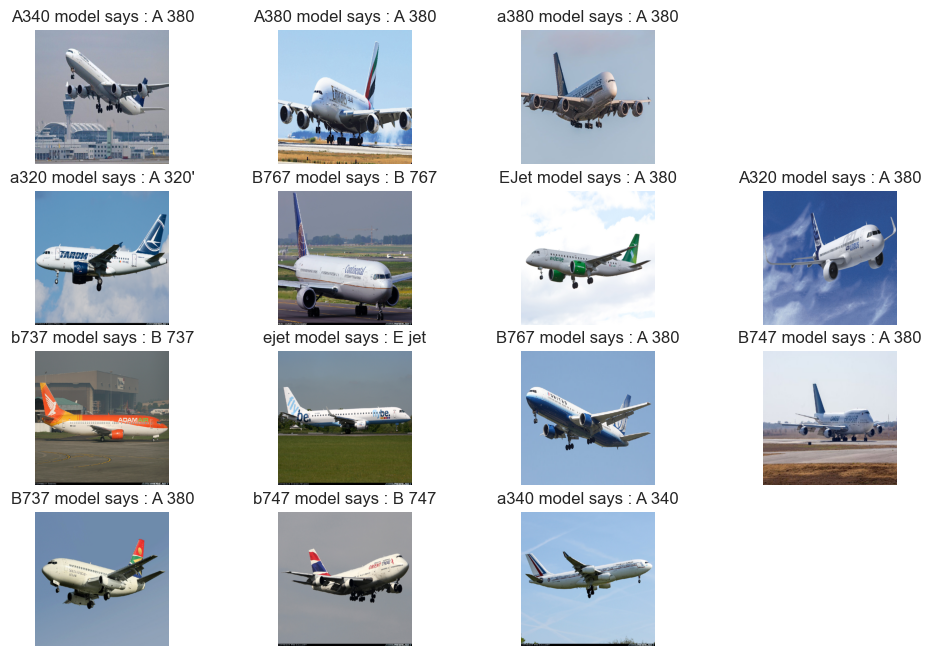

In [41]:
def plot_test_set_results(path,  n_ligne = 3, n_col = 4):
    
  plt.figure(figsize = ((n_ligne * n_col), (max(n_ligne, n_col) * 2) ))

  files = os.listdir(path)

  for i, filename in enumerate(files):
      
    if filename != '.DS_Store':
        
        ax = plt.subplot(n_ligne, n_col, i + 1)

        x = rgb_to_grayscale(path + '/' + filename)
        preds_probs = model.predict(np.expand_dims(x, axis = 0))
        predicted = np.argmax(preds_probs, axis = 1)[0]

        img = image.load_img(path + '/' + filename,target_size = target_dim)
        plt.axis("off")
        plt.imshow(img)

        if predicted == 0 :
          ax.set_title(f"{filename[0:4]} model says : A 320'")
        elif predicted == 1:
          ax.set_title(f"{filename[0:4]} model says : A 340")
        elif predicted == 2:
          ax.set_title(f"{filename[0:4]} model says : A 380")
        elif predicted == 3:
          ax.set_title(f"{filename[0:4]} model says : B 737")
        elif predicted == 4:
          ax.set_title(f"{filename[0:4]} model says : B 747")
        elif predicted == 5:
          ax.set_title(f"{filename[0:4]} model says : B 767")
        elif predicted == 6:
          ax.set_title(f"{filename[0:4]} model says : E jet")



Save model

In [42]:
#model.save('aircraft_model_096.keras', overwrite = True)